In [1]:
import data_preparation as dp
import tensorflow as tf
import pandas as pd
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/robin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-09-12 19:10:42.945266: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = dp.get_data(path_dialog_acts= "../res/dialog_acts.dat")
df

,class,lines,tokenized
0,6,im looking for a moderately priced restaurant ...,"[im, looking, for, a, moderately, priced, rest..."
1,6,any part of town,"[any, part, of, town]"
2,6,bistro food,"[bistro, food]"
3,3,is there a moderately priced restaurant that s...,"[is, there, a, moderately, priced, restaurant,..."
4,1,yes,[yes]
...,...,...,...
25496,12,what is the price range,"[what, is, the, price, range]"
25497,14,thank you good bye,"[thank, you, good, bye]"
25498,6,im looking for african food,"[im, looking, for, african, food]"
25499,12,whats the address and phone number,"[whats, the, address, and, phone, number]"


In [3]:
# categories y:
y = tf.keras.utils.to_categorical(
    df["class"].to_numpy().reshape(25501), num_classes=15, dtype= "int64"
)
y.shape

(25501, 15)

In [4]:
# create the tokenizer for x:
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(df["lines"])
# integer encode documents
x = t.texts_to_matrix(df["lines"], mode='count')
x.shape

(25501, 785)

In [5]:
# split in test and training data:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(785,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation="softmax")
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2023-09-12 19:10:48.383137: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
112/112 [==============================] - 7s 51ms/step - loss: 0.8598 - accuracy: 0.8297 - val_loss: 0.1852 - val_accuracy: 0.9563
Epoch 2/10
112/112 [==============================] - 3s 28ms/step - loss: 0.1360 - accuracy: 0.9671 - val_loss: 0.0858 - val_accuracy: 0.9790
Epoch 3/10
112/112 [==============================] - 3s 28ms/step - loss: 0.0693 - accuracy: 0.9824 - val_loss: 0.0660 - val_accuracy: 0.9832
Epoch 4/10
112/112 [==============================] - 2s 16ms/step - loss: 0.0451 - accuracy: 0.9882 - val_loss: 0.0622 - val_accuracy: 0.9832
Epoch 5/10
112/112 [==============================] - 3s 23ms/step - loss: 0.0299 - accuracy: 0.9923 - val_loss: 0.0622 - val_accuracy: 0.9824
Epoch 6/10
112/112 [==============================] - 4s 33ms/step - loss: 0.0218 - accuracy: 0.9944 - val_loss: 0.0574 - val_accuracy: 0.9860
Epoch 7/10
112/112 [==============================] - 2s 15ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0621 - val_accuracy: 0.9832

In [13]:
test = model.predict(x_test)


240/240 [==============================] - 3s 14ms/step


In [19]:
print(y_test[0])
test[0].argmax()

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


6

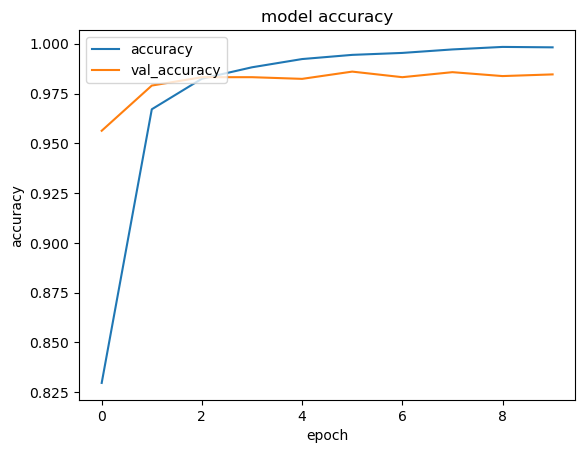

In [11]:
# Plotting Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()
